In [1]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from prophet import Prophet
from datetime import datetime

In [2]:
# Function to fetch stock data
def fetch_stock_data(stock_code, start_date='2015-01-01'):
    stock_data = yf.download(stock_code, start=start_date)
    stock_data.reset_index(inplace=True)
    return stock_data

In [3]:
# Fetch historical data
stock_code = 'AAPL'  # Replace with your desired stock code
data = fetch_stock_data(stock_code)
data['Date'] = pd.to_datetime(data['Date'])

[*********************100%***********************]  1 of 1 completed


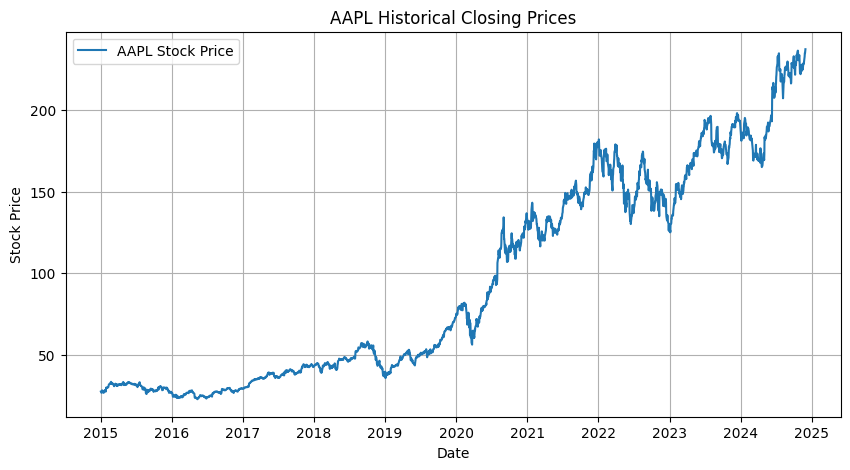

In [4]:

# Plot historical closing prices
plt.figure(figsize=(10, 5))
plt.plot(data['Date'], data['Close'], label=f'{stock_code} Stock Price')
plt.title(f'{stock_code} Historical Closing Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()


In [5]:
# Prepare data for Prophet (Long-term Forecasting)
prophet_df = data[['Date', 'Close']].copy()
prophet_df.columns = ['ds', 'y']
prophet_df['ds'] = pd.to_datetime(prophet_df['ds']).dt.tz_localize(None)



In [6]:
# Initialize and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_df)


22:34:03 - cmdstanpy - INFO - Chain [1] start processing
22:34:05 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
# Make future predictions
future = prophet_model.make_future_dataframe(periods=365)
forecast = prophet_model.predict(future)

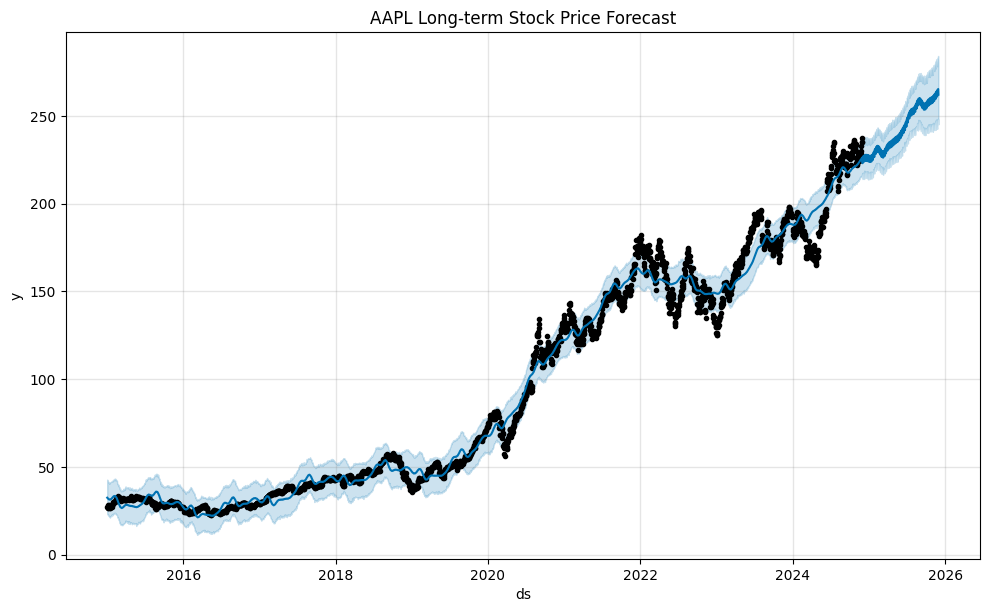

In [8]:
# Plot long-term forecast
prophet_model.plot(forecast)
plt.title(f'{stock_code} Long-term Stock Price Forecast')
plt.show()
